In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1,)# (1,1,1,0)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
res_ds_clf = pd.read_csv('evaluation_classif_full.csv', index_col=0)
print(res_ds_clf.shape)
res_ds_clf.head()

(480, 18)


,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_accuracy_train,metric_accuracy_test,metric_f1_train,metric_f1_test,metric_roc_train,metric_roc_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo
0,DecisionTreeClassifier,adult,0,26048,6513,0.105370,42,0.999578,0.787502,0.999122,0.564780,0.999123,0.713776,NaN,NaN,NaN,NaN,NaN
1,RandomForestClassifier,adult,0,26048,6513,0.087283,42,0.850392,0.829418,0.634462,0.579326,0.744208,0.712558,5.0,10.0,NaN,NaN,NaN
2,RandomForestClassifier,adult,0,26048,6513,2.493777,42,0.999539,0.826961,0.999043,0.609629,0.999370,0.735879,NaN,NaN,NaN,NaN,NaN
3,GradientBoostingClassifier,adult,0,26048,6513,2.102144,42,0.849048,0.838323,0.645957,0.622174,0.754491,0.740548,NaN,NaN,NaN,NaN,NaN
4,LGBMClassifier,adult,0,26048,6513,308.169476,42,0.865748,0.841701,0.694665,0.641641,0.786789,0.754919,NaN,NaN,NaN,NaN,NaN


In [5]:
res_ds_regr = pd.read_csv('evaluation_regr_full1.csv', index_col=0)
print(res_ds_regr.shape)
res_ds_regr.head()

(200, 20)


,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_mse_train,metric_mse_test,metric_mae_train,metric_mae_test,metric_r2_train,metric_r2_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo,metric_wape_train,metric_wape_test
0,DecisionTreeRegressor,calhouse,0,16512,4128,0.151587,42,1.051528e-31,0.793655,4.867984e-17,0.623827,1.000000,0.261216,NaN,NaN,NaN,NaN,NaN,2.248564e-17,0.370648
1,RandomForestRegressor,calhouse,0,16512,4128,0.277177,42,2.019904e-01,0.599036,3.110937e-01,0.580684,0.850314,0.442380,5.0,10.0,NaN,NaN,NaN,1.436969e-01,0.345015
2,RandomForestRegressor,calhouse,0,16512,4128,9.033681,42,3.465075e-02,0.521694,1.203863e-01,0.543827,0.974322,0.514374,NaN,NaN,NaN,NaN,NaN,5.560749e-02,0.323116
3,GradientBoostingRegressor,calhouse,0,16512,4128,2.807599,42,2.649648e-01,0.427120,3.613307e-01,0.523329,0.803647,0.602410,NaN,NaN,NaN,NaN,NaN,1.669018e-01,0.310937
4,LGBMRegressor,calhouse,0,16512,4128,200.734206,42,1.627876e-01,0.370611,2.791399e-01,0.446897,0.879366,0.655012,NaN,NaN,NaN,NaN,NaN,1.289371e-01,0.265525


# Compare the time to construct a lattice

In [6]:
res_ds_both = pd.concat([res_ds_regr, res_ds_clf])
res_ds_both.head()

,ds,fold_id,metric_accuracy_test,metric_accuracy_train,metric_f1_test,metric_f1_train,metric_mae_test,metric_mae_train,metric_mse_test,metric_mse_train,...,model,param_algo,param_algo_params,param_gen_algo,param_max_depth,param_n_estimators,param_random_state,test_size,time,train_size
0,calhouse,0,NaN,NaN,NaN,NaN,0.623827,4.867984e-17,0.793655,1.051528e-31,...,DecisionTreeRegressor,NaN,NaN,NaN,NaN,NaN,42,4128,0.151587,16512
1,calhouse,0,NaN,NaN,NaN,NaN,0.580684,3.110937e-01,0.599036,2.019904e-01,...,RandomForestRegressor,NaN,NaN,NaN,10.0,5.0,42,4128,0.277177,16512
2,calhouse,0,NaN,NaN,NaN,NaN,0.543827,1.203863e-01,0.521694,3.465075e-02,...,RandomForestRegressor,NaN,NaN,NaN,NaN,NaN,42,4128,9.033681,16512
3,calhouse,0,NaN,NaN,NaN,NaN,0.523329,3.613307e-01,0.427120,2.649648e-01,...,GradientBoostingRegressor,NaN,NaN,NaN,NaN,NaN,42,4128,2.807599,16512
4,calhouse,0,NaN,NaN,NaN,NaN,0.446897,2.791399e-01,0.370611,1.627876e-01,...,LGBMRegressor,NaN,NaN,NaN,NaN,NaN,42,4128,200.734206,16512


In [7]:
res_ds_both['model_base'] = [x.replace('Regressor','').replace('Classifier', '') for x in res_ds_both['model']]

cds = res_ds_both[res_ds_both['model_base']=='DecisionLattice']

#cds = cds[cds['param_gen_algo'].isna()]

cds['param_n_estimators'] = [
    json.loads(x.replace("'", '"'))['rf_params']['n_estimators']
    if 'rf_params' in x else None for x in cds['param_algo_params']]

cds['model'] = cds['model_base']+'_'+cds['param_algo']+'_'+cds['param_n_estimators'].fillna('').astype(str)
cds['model'] = cds['model']+'_'+cds['param_gen_algo'].replace('approximate','approx.').fillna('')
cds['model'] = [x.replace('DecisionLattice', 'DL').replace('RandomForest', 'RF').replace('.0','').strip('_')
                for x in cds['model']]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

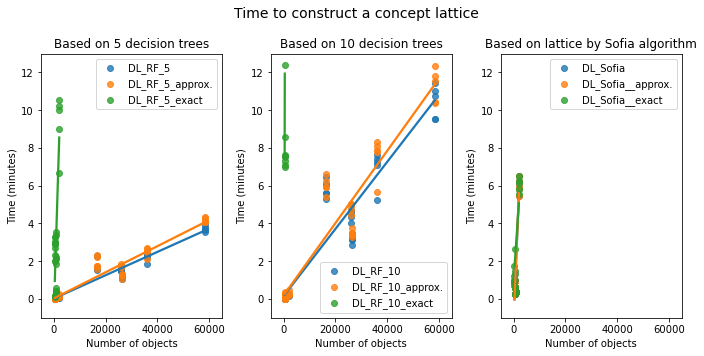

In [8]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
cds_ = cds[cds['param_n_estimators']==5]
#cds_ = cds[(cds['param_n_estimators']==5)|(cds['model']=='DL_Sofia')]
for model_name in cds_['model'].unique():
    sns.regplot(x='train_size', y='time',  data=cds_[cds_['model']==model_name], label=model_name, ci=None)
plt.legend()

#plt.xticks(range)
yticks = np.arange(0, cds['time'].max()+60, 120)
plt.yticks(yticks, [f"{t:.0f}" for t in yticks/60])
plt.xlabel('Number of objects')
plt.ylabel('Time (minutes)')
plt.title('Based on 5 decision trees')
plt.xlim(-5000,65000)
plt.ylim(-60, 13*60)

plt.subplot(1,3,2)
cds_ = cds[cds['param_n_estimators']==10]
#cds_ = cds[(cds['param_n_estimators']==10)|(cds['model']=='DL_Sofia')]
for model_name in cds_['model'].unique():
    sns.regplot(x='train_size', y='time',  data=cds_[cds_['model']==model_name], label=model_name, x_jitter=False, ci=None)
plt.legend()

#plt.xticks(range)
yticks = np.arange(0, cds['time'].max()+60, 120)
plt.yticks(yticks, [f"{t:.0f}" for t in yticks/60])
plt.xlabel('Number of objects')
plt.ylabel('Time (minutes)')
plt.title('Based on 10 decision trees')
plt.xlim(-5000,65000)
plt.ylim(-60, 13*60)


plt.subplot(1,3,3)
#cds_ = cds[(cds['model']=='DL_Sofia')]
cds_ = cds[cds['param_algo']=='Sofia']
for model_name in cds_['model'].unique():
    sns.regplot(x='train_size', y='time',  data=cds_[cds_['model']==model_name], label=model_name, x_jitter=False, ci=None)
plt.legend()

#plt.xticks(range)
yticks = np.arange(0, cds['time'].max()+60, 120)
plt.yticks(yticks, [f"{t:.0f}" for t in yticks/60])
plt.xlabel('Number of objects')
plt.ylabel('Time (minutes)')
plt.title('Based on lattice by Sofia algorithm')
plt.xlim(-5000,65000)
plt.ylim(-60, 13*60)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.suptitle('Time to construct a concept lattice', size=14)

fig.savefig('time_to_construct.eps', dpi=1200)
plt.show()

# Classification results

In [9]:
res_ds_clf = pd.read_csv('evaluation_classif_full.csv', index_col=0)
print(res_ds_clf.shape)
res_ds_clf.head()

(480, 18)


,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_accuracy_train,metric_accuracy_test,metric_f1_train,metric_f1_test,metric_roc_train,metric_roc_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo
0,DecisionTreeClassifier,adult,0,26048,6513,0.105370,42,0.999578,0.787502,0.999122,0.564780,0.999123,0.713776,NaN,NaN,NaN,NaN,NaN
1,RandomForestClassifier,adult,0,26048,6513,0.087283,42,0.850392,0.829418,0.634462,0.579326,0.744208,0.712558,5.0,10.0,NaN,NaN,NaN
2,RandomForestClassifier,adult,0,26048,6513,2.493777,42,0.999539,0.826961,0.999043,0.609629,0.999370,0.735879,NaN,NaN,NaN,NaN,NaN
3,GradientBoostingClassifier,adult,0,26048,6513,2.102144,42,0.849048,0.838323,0.645957,0.622174,0.754491,0.740548,NaN,NaN,NaN,NaN,NaN
4,LGBMClassifier,adult,0,26048,6513,308.169476,42,0.865748,0.841701,0.694665,0.641641,0.786789,0.754919,NaN,NaN,NaN,NaN,NaN


In [10]:
res_ds_clf['model_base'] = [x.replace('Regressor','').replace('Classifier', '') for x in res_ds_clf['model']]

In [11]:
flg = res_ds_clf['param_n_estimators'].isna()
res_ds_clf.loc[flg, 'param_n_estimators'] = [
    json.loads(x.replace("'", '"'))['rf_params']['n_estimators']
    if x is not None and type(x)==str and 'rf_params' in x else None for x in res_ds_clf.loc[flg, 'param_algo_params']]

In [12]:
res_ds_clf['model'] = res_ds_clf['model_base']+'_'+res_ds_clf['param_algo'].fillna('')+'_'+res_ds_clf['param_n_estimators'].fillna('').astype(str)
res_ds_clf['model'] = res_ds_clf['model']+'_'+res_ds_clf['param_gen_algo'].replace('approximate','approx.').fillna('')

In [13]:
for s_from, s_to in [
    ('DecisionTree', 'DT'), ('GradientBoosting', 'GB'), ('CatBoost', "CB"),
    ('DecisionLattice', 'DL'), ('RandomForest', 'RF'), ('.0','',),
    ('__','_')
]:
    res_ds_clf['model'] = [x.replace(s_from, s_to).strip('_') for x in res_ds_clf['model']]


In [14]:
rf_vs_fca_models = ['DL_RF_5','DL_RF_5_approx.','DL_RF_5_exact','RF_5']

In [15]:
models_order = [
    'DL_RF_5', 'DL_RF_5_approx.', 'DL_RF_5_exact',
    'DL_RF_10', 'DL_RF_10_approx.',
    'DL_Sofia', 'DL_Sofia_approx.', 'DL_Sofia_exact', 
    'DT','RF_5', 'RF', 'GB', 'LGBM',  'CB',
]

In [16]:
res_ds = res_ds_clf

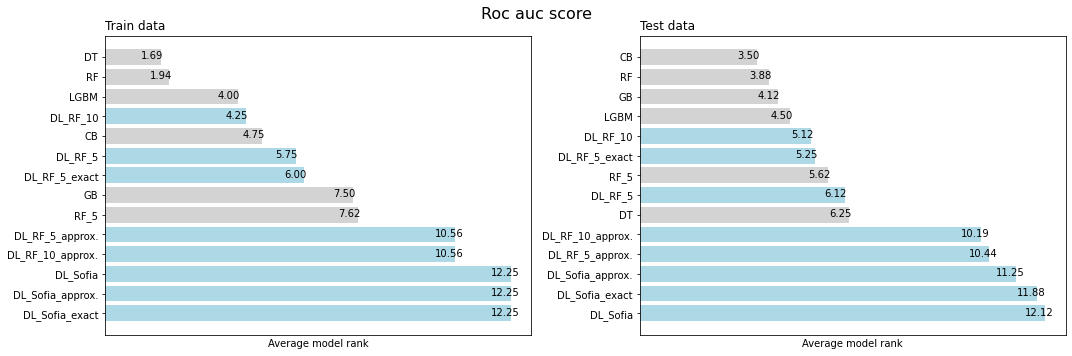

In [17]:
cds = []
for ds_type in ['train', 'test']:
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'metric_roc_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    cds_ = train_pivot_ds.rank(0, ascending=False).mean(1).reset_index().rename(columns={0: 'metric'})
    cds_['ds_type'] = ds_type
    cds.append(cds_)
cds = pd.concat(cds)

fig = plt.figure(figsize=(15,5), )

plt.subplot(1,2,1)
cds_ = cds[cds['ds_type']=='train'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.gca().invert_yaxis()
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')

plt.subplot(1,2,2)
cds_ = cds[cds['ds_type']=='test'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
plt.gca().invert_yaxis()
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.title('Test data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Roc auc score', size=16)
plt.show()

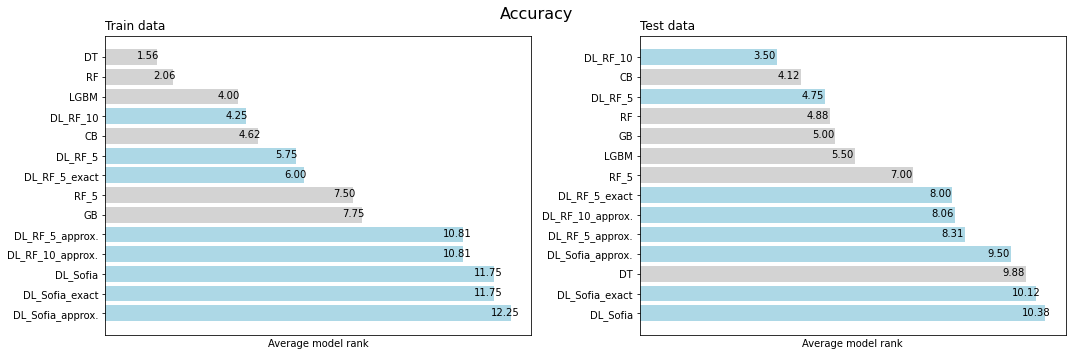

In [18]:
cds = []
for ds_type in ['train', 'test']:
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'metric_accuracy_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    cds_ = train_pivot_ds.rank(0, ascending=False).mean(1).reset_index().rename(columns={0: 'metric'})
    cds_['ds_type'] = ds_type
    cds.append(cds_)
cds = pd.concat(cds)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cds_ = cds[cds['ds_type']=='train'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.gca().invert_yaxis()
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')

plt.subplot(1,2,2)
cds_ = cds[cds['ds_type']=='test'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
plt.gca().invert_yaxis()
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.title('Test data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Accuracy', size=16)
plt.show()

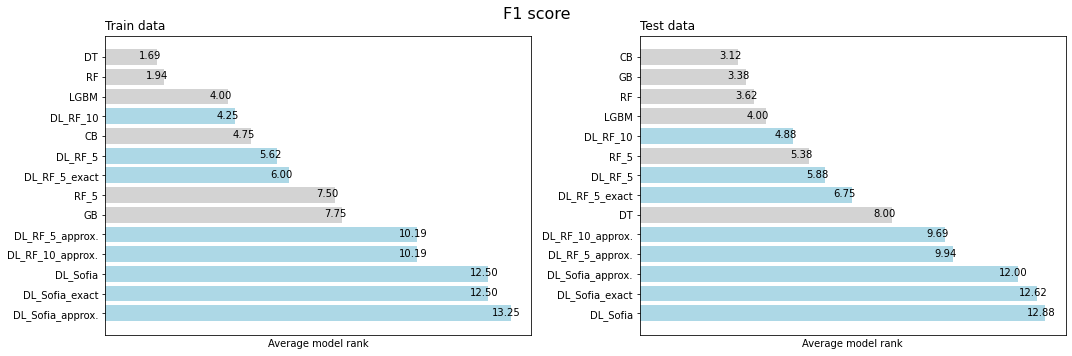

In [19]:
cds = []
for ds_type in ['train', 'test']:
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'metric_f1_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    cds_ = train_pivot_ds.rank(0, ascending=False).mean(1).reset_index().rename(columns={0: 'metric'})
    cds_['ds_type'] = ds_type
    cds.append(cds_)
cds = pd.concat(cds)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cds_ = cds[cds['ds_type']=='train'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.gca().invert_yaxis()
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')

plt.subplot(1,2,2)
cds_ = cds[cds['ds_type']=='test'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
plt.gca().invert_yaxis()
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.title('Test data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('F1 score', size=16)
plt.show()

## Classification results as latex tables

In [20]:
def prepare_result_table_tolatex(res_ds, models_order, ds_type, metric, ascending=False):
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'{metric}_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    train_pivot_ds = train_pivot_ds.T

    train_pivot_ds = train_pivot_ds.round(2)
    train_pivot_ds_rank = train_pivot_ds.rank(1, ascending=not ascending)
    train_pivot_ds.loc['mean rank'] = train_pivot_ds_rank.mean(0)
    train_pivot_ds = train_pivot_ds.round(2)
    
    return train_pivot_ds

In [21]:
def combine_train_test_tables(res_ds, models_order, metric, ascending=False):
    cdss = []
    for ds_type in ['train', 'test']:
        cds = prepare_result_table_tolatex(res_ds, models_order, ds_type, metric, ascending=ascending).T
        columns_order = cds.columns
        cds.columns = pd.MultiIndex.from_tuples([(f, ds_type) for f in cds.columns])
        cdss.append(cds)
    cds = pd.concat(cdss, 1)
    cds = cds[[(f, ds_type) for f in columns_order for ds_type in ['train', 'test']]]
    return cds

In [22]:
def prepare_result_table_tolatex_diff(res_ds, models_order, ds_type, metric, ascending=False):
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'{metric}_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    train_pivot_ds = train_pivot_ds
    train_pivot_ds.loc['best'] = train_pivot_ds.max() if ascending else train_pivot_ds.min()
    train_pivot_ds.iloc[:-1] = (train_pivot_ds.iloc[:-1]-train_pivot_ds.loc['best'])
    train_pivot_ds['mean diff'] = train_pivot_ds.mean(1)
    
    #train_pivot_ds['mean diff rank'] = train_pivot_ds.drop('best')['mean diff'].rank(ascending=ascending)
    train_pivot_ds = train_pivot_ds.round(2)
    
    train_pivot_ds = train_pivot_ds.T
    
    return train_pivot_ds

In [23]:
def combine_train_test_tables_diff(res_ds, models_order, metric, ascending=False):
    cdss = []
    for ds_type in ['train', 'test']:
        cds = prepare_result_table_tolatex_diff(res_ds, models_order, ds_type, metric, ascending=ascending).T
        columns_order = cds.columns
        cds.columns = pd.MultiIndex.from_tuples([(f, ds_type) for f in cds.columns])
        cdss.append(cds)
    #return cdss
    cds = pd.concat(cdss, 1)
    cds = cds[[(f, ds_type) for f in columns_order for ds_type in ['train', 'test']]]
    return cds

In [24]:
metric = 'metric_accuracy'
cds = combine_train_test_tables_diff(res_ds_clf, models_order, metric, ascending=True)

In [25]:
cds

adult       amazon        bank       breast       heart  \
                 train  test  train  test train  test  train  test train   
model                                                                      
DL_RF_5          -0.15 -0.01  -0.01 -0.00 -0.08 -0.00  -0.00 -0.00 -0.03   
DL_RF_5_approx.  -0.24 -0.09  -0.03 -0.01 -0.12  0.00  -0.59 -0.57 -0.44   
DL_RF_5_exact      NaN   NaN    NaN   NaN   NaN   NaN  -0.00 -0.01 -0.03   
DL_RF_10         -0.14 -0.01  -0.01 -0.00 -0.07 -0.00  -0.00 -0.00 -0.01   
DL_RF_10_approx. -0.24 -0.09  -0.03 -0.01 -0.12  0.00  -0.36 -0.39 -0.45   
DL_Sofia           NaN   NaN    NaN   NaN   NaN   NaN  -0.34 -0.31 -0.37   
DL_Sofia_approx.   NaN   NaN    NaN   NaN   NaN   NaN  -0.34 -0.31 -0.46   
DL_Sofia_exact     NaN   NaN    NaN   NaN   NaN   NaN  -0.34 -0.31 -0.37   
DT                0.00 -0.07   0.00 -0.01  0.00 -0.15   0.00 -0.04  0.00   
RF_5             -0.15 -0.01  -0.02 -0.00 -0.08 -0.02  -0.01 -0.01 -0.05   
RF               -0.00 -0.02   0.00  0.00  0.00 -0.02   0.00  0.00  0.00   
GB               -0.15 -0.00  -0.03 -0.01 -0.09 -0.01   0.00 -0.01 -0.08   
LGBM             -0.13 -0.00  -0.02 -0.00 -0.07 -0.03   0.00 -0.01  0.00   
CB               -0.14  0.00  -0.02 -0.00 -0.06 -0.04   0.00 -0.00 -0.01   
best              1.00  0.85   0.97  0.95  1.00  0.88   1.00  0.96  1.00   

                        kick       mammograph       seismic       mean diff  \
                  test train  test      train  test   train  test     train   
model                                                                         
DL_RF_5          -0.03 -0.09 -0.00      -0.02 -0.01   -0.02 -0.00     -0.05   
DL_RF_5_approx.  -0.20 -0.12 -0.02      -0.30 -0.17   -0.07  0.00     -0.24   
DL_RF_5_exact    -0.05   NaN   NaN      -0.02 -0.03   -0.02 -0.02     -0.02   
DL_RF_10          0.00 -0.09 -0.00      -0.01 -0.01   -0.02 -0.00     -0.04   
DL_RF_10_approx. -0.20 -0.12 -0.02      -0.28 -0.16   -0.07  0.00     -0.21   
DL_Sofia         -0.33   NaN   NaN      -0.40 -0.31   -0.07  0.00     -0.30   
DL_Sofia_approx. -0.22   NaN   NaN      -0.39 -0.27   -0.07  0.00     -0.32   
DL_Sofia_exact   -0.33   NaN   NaN      -0.40 -0.31   -0.07  0.00     -0.30   
DT               -0.18  0.00 -0.09       0.00 -0.07    0.00 -0.08      0.00   
RF_5             -0.07 -0.10 -0.00      -0.04 -0.03   -0.03 -0.01     -0.06   
RF               -0.01 -0.00 -0.00       0.00 -0.03   -0.00 -0.01     -0.00   
GB               -0.01 -0.10 -0.00      -0.07  0.00   -0.04 -0.02     -0.07   
LGBM             -0.04 -0.09 -0.00      -0.03 -0.02   -0.00 -0.01     -0.04   
CB               -0.01 -0.09  0.00      -0.04 -0.01   -0.03 -0.00     -0.05   
best              0.76  1.00  0.90       0.95  0.83    1.00  0.93      0.99   

                        
                  test  
model                   
DL_RF_5          -0.01  
DL_RF_5_approx.  -0.13  
DL_RF_5_exact    -0.03  
DL_RF_10         -0.00  
DL_RF_10_approx. -0.11  
DL_Sofia         -0.24  
DL_Sofia_approx. -0.20  
DL_Sofia_exact   -0.24  
DT               -0.08  
RF_5             -0.02  
RF               -0.01  
GB               -0.01  
LGBM             -0.01  
CB               -0.01  
best              0.88

In [26]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{adult} & \multicolumn{2}{l}{amazon} & \multicolumn{2}{l}{bank} & \multicolumn{2}{l}{breast} & \multicolumn{2}{l}{heart} & \multicolumn{2}{l}{kick} & \multicolumn{2}{l}{mammograph} & \multicolumn{2}{l}{seismic} & \multicolumn{2}{l}{mean diff} \\
{} & train &  test &  train &  test & train &  test &  train &  test & train &  test & train &  test &      train &  test &   train &  test &     train &  test \\
model            &       &       &        &       &       &       &        &       &       &       &       &       &            &       &         &       &           &       \\
\midrule
DL\_RF\_5          & -0.15 & -0.01 &  -0.01 & -0.00 & -0.08 & -0.00 &  -0.00 & -0.00 & -0.03 & -0.03 & -0.09 & -0.00 &      -0.02 & -0.01 &   -0.02 & -0.00 &     -0.05 & -0.01 \\
DL\_RF\_5\_approx.  & -0.24 & -0.09 &  -0.03 & -0.01 & -0.12 &  0.00 &  -0.59 & -0.57 & -0.44 & -0.20 & -0.12 & -0.02 &      -0.30 & -0.17 &   -0.07 &  0.00 

In [27]:
metric = 'metric_f1'
cds = combine_train_test_tables_diff(res_ds_clf, models_order, metric, ascending=True)

In [28]:
cds

adult       amazon        bank       breast       heart  \
                 train  test  train  test train  test  train  test train   
model                                                                      
DL_RF_5          -0.35 -0.06  -0.01 -0.00 -0.41 -0.16  -0.01 -0.01 -0.03   
DL_RF_5_approx.  -1.00 -0.65  -0.01 -0.00 -0.99 -0.48  -0.46 -0.43 -0.29   
DL_RF_5_exact      NaN   NaN    NaN   NaN   NaN   NaN  -0.01 -0.01 -0.03   
DL_RF_10         -0.33 -0.05  -0.01 -0.00 -0.37 -0.14  -0.00 -0.00 -0.01   
DL_RF_10_approx. -1.00 -0.65  -0.01 -0.00 -1.00 -0.48  -0.32 -0.31 -0.29   
DL_Sofia           NaN   NaN    NaN   NaN   NaN   NaN  -1.00 -0.95 -0.33   
DL_Sofia_approx.   NaN   NaN    NaN   NaN   NaN   NaN  -1.00 -0.95 -0.36   
DL_Sofia_exact     NaN   NaN    NaN   NaN   NaN   NaN  -1.00 -0.95 -0.33   
DT                0.00 -0.10  -0.00 -0.01  0.00 -0.24   0.00 -0.06  0.00   
RF_5             -0.35 -0.05  -0.01 -0.00 -0.41 -0.12  -0.01 -0.01 -0.05   
RF               -0.00 -0.04   0.00  0.00  0.00 -0.11   0.00  0.00  0.00   
GB               -0.36 -0.02  -0.01 -0.00 -0.47  0.00   0.00 -0.01 -0.07   
LGBM             -0.31 -0.00  -0.01 -0.00 -0.32 -0.04   0.00 -0.02  0.00   
CB               -0.31  0.00  -0.01 -0.00 -0.31 -0.05   0.00 -0.01 -0.01   
best              1.00  0.65   0.98  0.97  1.00  0.48   1.00  0.95  1.00   

                        kick       mammograph       seismic       mean diff  \
                  test train  test      train  test   train  test     train   
model                                                                         
DL_RF_5          -0.02 -0.59 -0.03      -0.03 -0.02   -0.24 -0.15     -0.21   
DL_RF_5_approx.  -0.08 -1.00 -0.35      -0.55 -0.42   -1.00 -0.15     -0.66   
DL_RF_5_exact    -0.04   NaN   NaN      -0.03 -0.03   -0.24 -0.11     -0.08   
DL_RF_10          0.00 -0.58 -0.03      -0.01 -0.02   -0.13 -0.15     -0.18   
DL_RF_10_approx. -0.08 -1.00 -0.35      -0.52 -0.38   -1.00 -0.15     -0.64   
DL_Sofia         -0.27   NaN   NaN      -0.87 -0.72   -1.00 -0.15     -0.80   
DL_Sofia_approx. -0.19   NaN   NaN      -0.87 -0.72   -1.00 -0.15     -0.81   
DL_Sofia_exact   -0.27   NaN   NaN      -0.87 -0.72   -1.00 -0.15     -0.80   
DT               -0.15  0.00 -0.05      -0.00 -0.08    0.00  0.00     -0.00   
RF_5             -0.07 -0.60 -0.02      -0.04 -0.02   -0.36 -0.07     -0.23   
RF               -0.00 -0.00 -0.01       0.00 -0.03   -0.00 -0.12     -0.00   
GB               -0.01 -0.62 -0.00      -0.07  0.00   -0.42 -0.09     -0.25   
LGBM             -0.03 -0.60 -0.00      -0.03 -0.02   -0.00 -0.11     -0.16   
CB               -0.01 -0.59  0.00      -0.04 -0.01   -0.33 -0.13     -0.20   
best              0.76  1.00  0.35       0.95  0.81    1.00  0.15      0.99   

                        
                  test  
model                   
DL_RF_5          -0.05  
DL_RF_5_approx.  -0.32  
DL_RF_5_exact    -0.05  
DL_RF_10         -0.05  
DL_RF_10_approx. -0.30  
DL_Sofia         -0.52  
DL_Sofia_approx. -0.50  
DL_Sofia_exact   -0.52  
DT               -0.09  
RF_5             -0.05  
RF               -0.04  
GB               -0.02  
LGBM             -0.03  
CB               -0.02  
best              0.64

In [29]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{adult} & \multicolumn{2}{l}{amazon} & \multicolumn{2}{l}{bank} & \multicolumn{2}{l}{breast} & \multicolumn{2}{l}{heart} & \multicolumn{2}{l}{kick} & \multicolumn{2}{l}{mammograph} & \multicolumn{2}{l}{seismic} & \multicolumn{2}{l}{mean diff} \\
{} & train &  test &  train &  test & train &  test &  train &  test & train &  test & train &  test &      train &  test &   train &  test &     train &  test \\
model            &       &       &        &       &       &       &        &       &       &       &       &       &            &       &         &       &           &       \\
\midrule
DL\_RF\_5          & -0.35 & -0.06 &  -0.01 & -0.00 & -0.41 & -0.16 &  -0.01 & -0.01 & -0.03 & -0.02 & -0.59 & -0.03 &      -0.03 & -0.02 &   -0.24 & -0.15 &     -0.21 & -0.05 \\
DL\_RF\_5\_approx.  & -1.00 & -0.65 &  -0.01 & -0.00 & -0.99 & -0.48 &  -0.46 & -0.43 & -0.29 & -0.08 & -1.00 & -0.35 &      -0.55 & -0.42 &   -1.00 & -0.15 

In [30]:
metric = 'metric_roc'
cds = combine_train_test_tables_diff(res_ds_clf, models_order, metric, ascending=True)

In [31]:
cds

adult       amazon        bank       breast       heart  \
                 train  test  train  test train  test  train  test train   
model                                                                      
DL_RF_5          -0.25 -0.04  -0.20 -0.12 -0.28 -0.11  -0.00 -0.00 -0.03   
DL_RF_5_approx.  -0.50 -0.26  -0.35 -0.22 -0.50 -0.24  -0.45 -0.42 -0.50   
DL_RF_5_exact      NaN   NaN    NaN   NaN   NaN   NaN  -0.00 -0.00 -0.03   
DL_RF_10         -0.23 -0.03  -0.15 -0.09 -0.25 -0.10  -0.00  0.00 -0.01   
DL_RF_10_approx. -0.50 -0.26  -0.35 -0.22 -0.50 -0.24  -0.28 -0.26 -0.50   
DL_Sofia           NaN   NaN    NaN   NaN   NaN   NaN  -0.50 -0.46 -0.41   
DL_Sofia_approx.   NaN   NaN    NaN   NaN   NaN   NaN  -0.50 -0.46 -0.48   
DL_Sofia_exact     NaN   NaN    NaN   NaN   NaN   NaN  -0.50 -0.46 -0.41   
DT               -0.00 -0.06   0.00  0.00  0.00 -0.12   0.00 -0.04  0.00   
RF_5             -0.25 -0.03  -0.30 -0.19 -0.28 -0.08  -0.01 -0.00 -0.05   
RF                0.00 -0.02  -0.04 -0.02  0.00 -0.08   0.00 -0.00  0.00   
GB               -0.25 -0.02  -0.34 -0.21 -0.30 -0.01   0.00 -0.01 -0.08   
LGBM             -0.21 -0.00  -0.25 -0.15 -0.21 -0.00   0.00 -0.02  0.00   
CB               -0.22  0.00  -0.23 -0.14 -0.21  0.00   0.00 -0.00 -0.01   
best              1.00  0.76   0.85  0.72  1.00  0.74   1.00  0.96  1.00   

                        kick       mammograph       seismic       mean diff  \
                  test train  test      train  test   train  test     train   
model                                                                         
DL_RF_5          -0.02 -0.37 -0.01      -0.03 -0.01   -0.19 -0.06     -0.17   
DL_RF_5_approx.  -0.23 -0.50 -0.11      -0.33 -0.20   -0.50 -0.05     -0.45   
DL_RF_5_exact    -0.02   NaN   NaN      -0.03 -0.03   -0.19 -0.05     -0.06   
DL_RF_10          0.00 -0.36 -0.01      -0.01 -0.02   -0.12 -0.05     -0.14   
DL_RF_10_approx. -0.23 -0.50 -0.11      -0.30 -0.18   -0.50 -0.05     -0.43   
DL_Sofia         -0.23   NaN   NaN      -0.44 -0.33   -0.50 -0.05     -0.46   
DL_Sofia_approx. -0.19   NaN   NaN      -0.43 -0.30   -0.50 -0.05     -0.48   
DL_Sofia_exact   -0.22   NaN   NaN      -0.44 -0.33   -0.50 -0.05     -0.46   
DT               -0.15  0.00 -0.01      -0.00 -0.07    0.00  0.00     -0.00   
RF_5             -0.07 -0.37 -0.01      -0.04 -0.03   -0.26 -0.03     -0.20   
RF               -0.01 -0.00 -0.00       0.00 -0.03   -0.00 -0.05     -0.01   
GB               -0.03 -0.38 -0.00      -0.07  0.00   -0.30 -0.05     -0.21   
LGBM             -0.03 -0.37 -0.00      -0.03 -0.02   -0.00 -0.05     -0.14   
CB               -0.03 -0.37  0.00      -0.04 -0.01   -0.25 -0.05     -0.16   
best              0.73  1.00  0.61       0.95  0.83    1.00  0.55      0.97   

                        
                  test  
model                   
DL_RF_5          -0.05  
DL_RF_5_approx.  -0.22  
DL_RF_5_exact    -0.03  
DL_RF_10         -0.04  
DL_RF_10_approx. -0.20  
DL_Sofia         -0.27  
DL_Sofia_approx. -0.25  
DL_Sofia_exact   -0.27  
DT               -0.05  
RF_5             -0.06  
RF               -0.03  
GB               -0.04  
LGBM             -0.03  
CB               -0.03  
best              0.74

In [32]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{adult} & \multicolumn{2}{l}{amazon} & \multicolumn{2}{l}{bank} & \multicolumn{2}{l}{breast} & \multicolumn{2}{l}{heart} & \multicolumn{2}{l}{kick} & \multicolumn{2}{l}{mammograph} & \multicolumn{2}{l}{seismic} & \multicolumn{2}{l}{mean diff} \\
{} & train &  test &  train &  test & train &  test &  train &  test & train &  test & train &  test &      train &  test &   train &  test &     train &  test \\
model            &       &       &        &       &       &       &        &       &       &       &       &       &            &       &         &       &           &       \\
\midrule
DL\_RF\_5          & -0.25 & -0.04 &  -0.20 & -0.12 & -0.28 & -0.11 &  -0.00 & -0.00 & -0.03 & -0.02 & -0.37 & -0.01 &      -0.03 & -0.01 &   -0.19 & -0.06 &     -0.17 & -0.05 \\
DL\_RF\_5\_approx.  & -0.50 & -0.26 &  -0.35 & -0.22 & -0.50 & -0.24 &  -0.45 & -0.42 & -0.50 & -0.23 & -0.50 & -0.11 &      -0.33 & -0.20 &   -0.50 & -0.05 

# Regression

In [33]:
res_ds = pd.read_csv('evaluation_regr_full1.csv', index_col=0)
print(res_ds.shape)
res_ds.head()

(200, 20)


,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_mse_train,metric_mse_test,metric_mae_train,metric_mae_test,metric_r2_train,metric_r2_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo,metric_wape_train,metric_wape_test
0,DecisionTreeRegressor,calhouse,0,16512,4128,0.151587,42,1.051528e-31,0.793655,4.867984e-17,0.623827,1.000000,0.261216,NaN,NaN,NaN,NaN,NaN,2.248564e-17,0.370648
1,RandomForestRegressor,calhouse,0,16512,4128,0.277177,42,2.019904e-01,0.599036,3.110937e-01,0.580684,0.850314,0.442380,5.0,10.0,NaN,NaN,NaN,1.436969e-01,0.345015
2,RandomForestRegressor,calhouse,0,16512,4128,9.033681,42,3.465075e-02,0.521694,1.203863e-01,0.543827,0.974322,0.514374,NaN,NaN,NaN,NaN,NaN,5.560749e-02,0.323116
3,GradientBoostingRegressor,calhouse,0,16512,4128,2.807599,42,2.649648e-01,0.427120,3.613307e-01,0.523329,0.803647,0.602410,NaN,NaN,NaN,NaN,NaN,1.669018e-01,0.310937
4,LGBMRegressor,calhouse,0,16512,4128,200.734206,42,1.627876e-01,0.370611,2.791399e-01,0.446897,0.879366,0.655012,NaN,NaN,NaN,NaN,NaN,1.289371e-01,0.265525


In [34]:
res_ds['model_base'] = [x.replace('Regressor','').replace('Classifier', '') for x in res_ds['model']]

In [35]:
flg = res_ds['param_n_estimators'].isna()
res_ds.loc[flg, 'param_n_estimators'] = [
    json.loads(x.replace("'", '"'))['rf_params']['n_estimators']
    if x is not None and type(x)==str and 'rf_params' in x else None for x in res_ds.loc[flg, 'param_algo_params']]

In [36]:
res_ds['model'] = res_ds['model_base']+'_'+res_ds['param_algo'].fillna('')+'_'+res_ds['param_n_estimators'].fillna('').astype(str)
res_ds['model'] = res_ds['model']+'_'+res_ds['param_gen_algo'].replace('approximate','approx.').fillna('')

In [37]:
for s_from, s_to in [
    ('DecisionTree', 'DT'), ('GradientBoosting', 'GB'), ('CatBoost', "CB"),
    ('DecisionLattice', 'DL'), ('RandomForest', 'RF'), ('.0','',),
    ('__','_')
]:
    res_ds['model'] = [x.replace(s_from, s_to).strip('_') for x in res_ds['model']]


In [38]:
train_metrics_ds = res_ds.groupby('model')[['metric_mse_train','metric_mae_train','metric_r2_train']].mean()
test_metrics_ds = res_ds.groupby('model')[['metric_mse_test','metric_mae_test','metric_r2_test']].mean()

In [39]:
models_order = [
    'DL_RF_5', 'DL_RF_5_approx.', 'DL_RF_5_exact',
    'DL_RF_10', 'DL_RF_10_approx.',
    'DL_Sofia', 'DL_Sofia_approx.', 'DL_Sofia_exact', 
    'DT','RF_5', 'RF', 'GB', 'LGBM',  'CB',
]

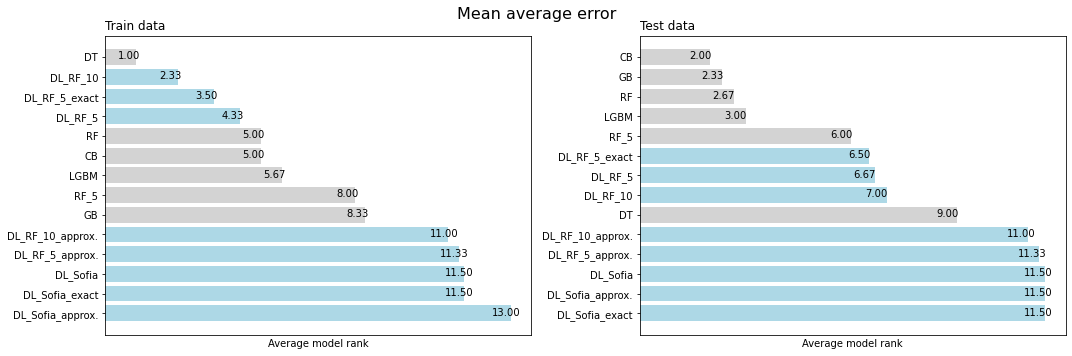

In [40]:
cds = []
for ds_type in ['train', 'test']:
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'metric_mae_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    cds_ = train_pivot_ds.rank(0, ascending=True).mean(1).reset_index().rename(columns={0: 'metric'})
    cds_['ds_type'] = ds_type
    cds.append(cds_)
cds = pd.concat(cds)

fig = plt.figure(figsize=(15,5), )

plt.subplot(1,2,1)
cds_ = cds[cds['ds_type']=='train'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.gca().invert_yaxis()
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')

plt.subplot(1,2,2)
cds_ = cds[cds['ds_type']=='test'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
plt.gca().invert_yaxis()
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.title('Test data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Mean average error', size=16)
plt.show()

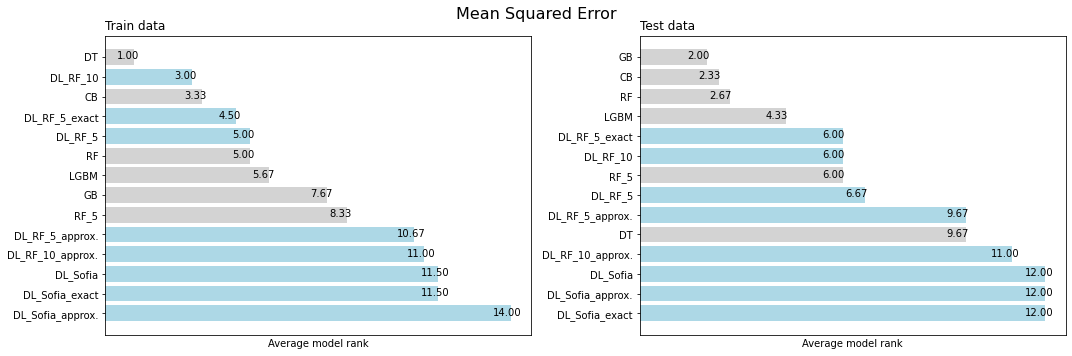

In [41]:
cds = []
for ds_type in ['train', 'test']:
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'metric_mse_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    cds_ = train_pivot_ds.rank(0, ascending=True).mean(1).reset_index().rename(columns={0: 'metric'})
    cds_['ds_type'] = ds_type
    cds.append(cds_)
cds = pd.concat(cds)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cds_ = cds[cds['ds_type']=='train'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.gca().invert_yaxis()
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')

plt.subplot(1,2,2)
cds_ = cds[cds['ds_type']=='test'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
plt.gca().invert_yaxis()
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.title('Test data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Mean Squared Error', size=16)
plt.show()

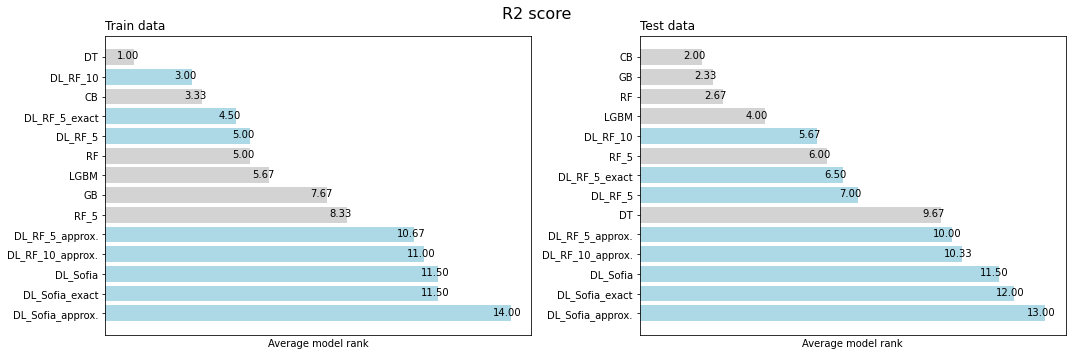

In [42]:
cds = []
for ds_type in ['train', 'test']:
    train_pivot_ds = res_ds.pivot_table(index='model',columns='ds', values=f'metric_r2_{ds_type}')
    train_pivot_ds = train_pivot_ds.loc[models_order]
    cds_ = train_pivot_ds.rank(0, ascending=False).mean(1).reset_index().rename(columns={0: 'metric'})
    cds_['ds_type'] = ds_type
    cds.append(cds_)
cds = pd.concat(cds)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cds_ = cds[cds['ds_type']=='train'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.gca().invert_yaxis()
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')

plt.subplot(1,2,2)
cds_ = cds[cds['ds_type']=='test'].sort_values('metric',ascending=True)
#sns.barplot(x='metric', y='model', data=cds_, color=['lightgrey' for x in cds_['model']])
plt.barh(cds_['model'], cds_['metric'],
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in cds_['model']])
plt.gca().invert_yaxis()
for idx, v in enumerate(cds_['metric']):
    plt.text(v-0.6, idx+0.1, f"{v:.2f}")
plt.title('Test data', loc='left')
plt.xticks([])
plt.xlabel('Average model rank')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('R2 score', size=16)
plt.show()

## Results as latex tables

In [43]:
metric = 'metric_mse'
cds = combine_train_test_tables(res_ds, models_order, metric, ascending=False)

In [44]:
cds

boston        calhouse       diabetes          mean rank  \
                  train   test    train  test    train     test     train   
model                                                                       
DL_RF_5            1.26  44.50     0.17  0.53   315.40  3486.56      5.00   
DL_RF_5_approx.   77.52  88.21     1.22  1.21  5693.89  5803.59     10.67   
DL_RF_5_exact      1.26  28.47      NaN   NaN   315.40  3615.83      4.50   
DL_RF_10           0.45  44.76     0.15  0.51    68.62  3455.00      2.83   
DL_RF_10_approx.  78.50  90.43     1.18  1.20  5827.82  5941.20     11.00   
DL_Sofia          79.36  90.95      NaN   NaN  5582.60  5852.40     11.50   
DL_Sofia_approx.  85.00  89.11      NaN   NaN  6443.51  6413.68     14.00   
DL_Sofia_exact    79.36  92.90      NaN   NaN  5582.60  5842.76     11.50   
DT                 0.00  38.31     0.00  0.82     0.00  6692.84      1.00   
RF_5               3.44  26.03     0.19  0.50  1015.35  4031.10      8.33   
RF                 1.50  21.37     0.03  0.43   475.16  3376.97      5.00   
GB                 1.74  18.68     0.25  0.41   966.24  3430.80      7.67   
LGBM               1.81  22.36     0.15  0.38   459.51  3625.62      5.83   
CB                 0.36  20.04     0.16  0.37   116.26  3472.50      3.33   

                         
                   test  
model                    
DL_RF_5            6.67  
DL_RF_5_approx.    9.67  
DL_RF_5_exact      6.00  
DL_RF_10           6.00  
DL_RF_10_approx.  11.00  
DL_Sofia          12.00  
DL_Sofia_approx.  12.00  
DL_Sofia_exact    12.00  
DT                 9.67  
RF_5               6.00  
RF                 2.67  
GB                 2.00  
LGBM               4.33  
CB                 2.33

In [45]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{boston} & \multicolumn{2}{l}{calhouse} & \multicolumn{2}{l}{diabetes} & \multicolumn{2}{l}{mean rank} \\
{} &  train &   test &    train &  test &    train &     test &     train &   test \\
model            &        &        &          &       &          &          &           &        \\
\midrule
DL\_RF\_5          &   1.26 &  44.50 &     0.17 &  0.53 &   315.40 &  3486.56 &      5.00 &   6.67 \\
DL\_RF\_5\_approx.  &  77.52 &  88.21 &     1.22 &  1.21 &  5693.89 &  5803.59 &     10.67 &   9.67 \\
DL\_RF\_5\_exact    &   1.26 &  28.47 &       &    &   315.40 &  3615.83 &      4.50 &   6.00 \\
DL\_RF\_10         &   0.45 &  44.76 &     0.15 &  0.51 &    68.62 &  3455.00 &      2.83 &   6.00 \\
DL\_RF\_10\_approx. &  78.50 &  90.43 &     1.18 &  1.20 &  5827.82 &  5941.20 &     11.00 &  11.00 \\
DL\_Sofia         &  79.36 &  90.95 &       &    &  5582.60 &  5852.40 &     11.50 &  12.00 \\
DL\_Sofia\_approx. &  85.00 &  89.11 &

In [46]:
metric = 'metric_mae'
cds = combine_train_test_tables(res_ds, models_order, metric, ascending=False)

In [47]:
cds

boston       calhouse       diabetes        mean rank       
                  train  test    train  test    train   test     train   test
model                                                                        
DL_RF_5            0.46  4.30     0.28  0.53     7.50  47.38      4.33   6.67
DL_RF_5_approx.    6.34  6.93     0.94  0.93    64.92  65.41     11.33  11.33
DL_RF_5_exact      0.46  3.60      NaN   NaN     7.50  48.57      3.50   6.50
DL_RF_10           0.22  4.35     0.27  0.52     2.23  47.46      2.67   7.00
DL_RF_10_approx.   6.32  6.92     0.92  0.92    65.55  66.20     11.00  11.00
DL_Sofia           6.61  7.19      NaN   NaN    61.03  64.15     11.50  11.50
DL_Sofia_approx.   6.79  7.00      NaN   NaN    64.51  64.26     13.00  11.50
DL_Sofia_exact     6.61  7.45      NaN   NaN    61.03  63.57     11.50  11.50
DT                 0.00  3.93     0.00  0.62     0.00  64.81      1.00   9.00
RF_5               1.16  3.32     0.30  0.51    22.94  50.25      8.00   6.00
RF                 0.82  3.03     0.12  0.47    17.55  47.23      5.00   3.00
GB                 1.03  3.00     0.35  0.47    24.60  46.81      8.33   2.17
LGBM               0.85  3.22     0.27  0.44    16.81  47.26      5.67   3.17
CB                 0.47  3.03     0.27  0.44     8.37  46.66      4.67   1.67

In [48]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{boston} & \multicolumn{2}{l}{calhouse} & \multicolumn{2}{l}{diabetes} & \multicolumn{2}{l}{mean rank} \\
{} &  train &  test &    train &  test &    train &   test &     train &   test \\
model            &        &       &          &       &          &        &           &        \\
\midrule
DL\_RF\_5          &   0.46 &  4.30 &     0.28 &  0.53 &     7.50 &  47.38 &      4.33 &   6.67 \\
DL\_RF\_5\_approx.  &   6.34 &  6.93 &     0.94 &  0.93 &    64.92 &  65.41 &     11.33 &  11.33 \\
DL\_RF\_5\_exact    &   0.46 &  3.60 &       &    &     7.50 &  48.57 &      3.50 &   6.50 \\
DL\_RF\_10         &   0.22 &  4.35 &     0.27 &  0.52 &     2.23 &  47.46 &      2.67 &   7.00 \\
DL\_RF\_10\_approx. &   6.32 &  6.92 &     0.92 &  0.92 &    65.55 &  66.20 &     11.00 &  11.00 \\
DL\_Sofia         &   6.61 &  7.19 &       &    &    61.03 &  64.15 &     11.50 &  11.50 \\
DL\_Sofia\_approx. &   6.79 &  7.00 &       &    &    64.51 & 

In [49]:
metric = 'metric_r2'
cds = combine_train_test_tables(res_ds, models_order, metric, ascending=True)

In [50]:
cds

boston       calhouse       diabetes       mean rank       
                  train  test    train  test    train  test     train   test
model                                                                       
DL_RF_5            0.98  0.16     0.87  0.58     0.95  0.40      5.50   6.67
DL_RF_5_approx.    0.07 -0.61     0.08  0.02     0.04  0.00     10.67  10.33
DL_RF_5_exact      0.98  0.48      NaN   NaN     0.95  0.37      5.25   6.25
DL_RF_10           0.99  0.17     0.88  0.59     0.99  0.40      3.17   6.00
DL_RF_10_approx.   0.06 -0.60     0.11  0.03     0.02 -0.02     11.00  10.33
DL_Sofia           0.04 -0.68      NaN   NaN     0.06 -0.00     11.50  11.25
DL_Sofia_approx.  -0.02 -0.68      NaN   NaN    -0.09 -0.10     14.00  12.75
DL_Sofia_exact     0.04 -0.72      NaN   NaN     0.06  0.00     11.50  12.00
DT                 1.00  0.22     1.00  0.34     1.00 -0.14      1.17   9.67
RF_5               0.96  0.56     0.86  0.60     0.83  0.30      8.33   6.00
RF                 0.98  0.63     0.97  0.65     0.92  0.42      4.83   2.67
GB                 0.98  0.67     0.81  0.67     0.84  0.41      7.33   2.33
LGBM               0.98  0.58     0.89  0.70     0.92  0.37      5.17   4.17
CB                 1.00  0.68     0.88  0.71     0.98  0.40      3.00   2.00

In [51]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{boston} & \multicolumn{2}{l}{calhouse} & \multicolumn{2}{l}{diabetes} & \multicolumn{2}{l}{mean rank} \\
{} &  train &  test &    train &  test &    train &  test &     train &   test \\
model            &        &       &          &       &          &       &           &        \\
\midrule
DL\_RF\_5          &   0.98 &  0.16 &     0.87 &  0.58 &     0.95 &  0.40 &      5.50 &   6.67 \\
DL\_RF\_5\_approx.  &   0.07 & -0.61 &     0.08 &  0.02 &     0.04 &  0.00 &     10.67 &  10.33 \\
DL\_RF\_5\_exact    &   0.98 &  0.48 &       &    &     0.95 &  0.37 &      5.25 &   6.25 \\
DL\_RF\_10         &   0.99 &  0.17 &     0.88 &  0.59 &     0.99 &  0.40 &      3.17 &   6.00 \\
DL\_RF\_10\_approx. &   0.06 & -0.60 &     0.11 &  0.03 &     0.02 & -0.02 &     11.00 &  10.33 \\
DL\_Sofia         &   0.04 & -0.68 &       &    &     0.06 & -0.00 &     11.50 &  11.25 \\
DL\_Sofia\_approx. &  -0.02 & -0.68 &       &    &    -0.09 & -0.10 & 

In [52]:
metric = 'metric_wape'
cds = combine_train_test_tables_diff(res_ds, models_order, metric, ascending=False)

In [53]:
cds

boston       calhouse       diabetes       mean diff      
                  train  test    train  test    train  test     train  test
model                                                                      
DL_RF_5            0.02  0.06     0.14  0.05     0.05  0.00      0.07  0.04
DL_RF_5_approx.    0.28  0.18     0.45  0.25     0.43  0.12      0.39  0.19
DL_RF_5_exact      0.02  0.03      NaN   NaN     0.05  0.01      0.03  0.02
DL_RF_10           0.01  0.07     0.13  0.04     0.01  0.01      0.05  0.04
DL_RF_10_approx.   0.28  0.18     0.45  0.25     0.43  0.13      0.39  0.18
DL_Sofia           0.29  0.20      NaN   NaN     0.40  0.11      0.35  0.16
DL_Sofia_approx.   0.30  0.19      NaN   NaN     0.42  0.11      0.36  0.15
DL_Sofia_exact     0.29  0.21      NaN   NaN     0.40  0.11      0.35  0.16
DT                 0.00  0.05     0.00  0.09     0.00  0.12      0.00  0.09
RF_5               0.05  0.01     0.14  0.04     0.15  0.02      0.12  0.03
RF                 0.04  0.00     0.06  0.02     0.12  0.00      0.07  0.01
GB                 0.05  0.00     0.17  0.02     0.16  0.00      0.13  0.01
LGBM               0.04  0.01     0.13  0.00     0.11  0.00      0.09  0.01
CB                 0.02  0.00     0.13  0.00     0.06  0.00      0.07  0.00
best               0.00  0.14     0.00  0.21     0.00  0.31      0.00  0.22

In [54]:
print(cds.to_latex().replace('NaN',''))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{boston} & \multicolumn{2}{l}{calhouse} & \multicolumn{2}{l}{diabetes} & \multicolumn{2}{l}{mean diff} \\
{} &  train &  test &    train &  test &    train &  test &     train &  test \\
model            &        &       &          &       &          &       &           &       \\
\midrule
DL\_RF\_5          &   0.02 &  0.06 &     0.14 &  0.05 &     0.05 &  0.00 &      0.07 &  0.04 \\
DL\_RF\_5\_approx.  &   0.28 &  0.18 &     0.45 &  0.25 &     0.43 &  0.12 &      0.39 &  0.19 \\
DL\_RF\_5\_exact    &   0.02 &  0.03 &       &    &     0.05 &  0.01 &      0.03 &  0.02 \\
DL\_RF\_10         &   0.01 &  0.07 &     0.13 &  0.04 &     0.01 &  0.01 &      0.05 &  0.04 \\
DL\_RF\_10\_approx. &   0.28 &  0.18 &     0.45 &  0.25 &     0.43 &  0.13 &      0.39 &  0.18 \\
DL\_Sofia         &   0.29 &  0.20 &       &    &     0.40 &  0.11 &      0.35 &  0.16 \\
DL\_Sofia\_approx. &   0.30 &  0.19 &       &    &     0.42 &  0.11 &      0.3